**Create Data** - We begin by creating our own data set for analysis. This prevents the end user reading this tutorial from having to download any files to replicate the results below. We will export this data set to a text file so that you can get some experience pulling data from a text file.

**Get Data** - We will learn how to read in the text file containing the MLIs. The data consist of MLIs used in the year 2016.

**Prepare Data** - Here we will simply take a look at the data and make sure it is clean. By clean I mean we will take a look inside the contents of the text file and look for any anomalities. These can include missing data, inconsistencies in the data, or any other data that seems out of place. If any are found we will then have to make decisions on what to do with these records.

**Analyze Data** - We will simply find the most popular MLI in a specific year.

**Present Data** - Through tabular data and a graph, clearly show the end user what is the most popular MLI in a specific year.

**NOTE:**

***Make sure you have looked through all previous lessons as the knowledge learned in previous lessons will be needed for this exercise.***

***Numpy*** will be used to help generate the sample data set. Importing the libraries is the first step we will take in the lesson.

In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.20.3
Matplotlib version 2.0.2


# Create Data

The data set will consist of 1,000 MLIs and the number of projects recorded for that year (2016). We will also add plenty of duplicates so you will see the same MLI more than once. You can think of the multiple entries per MLI simply being different programs reporting the number of projects per MLI. So if two programs reported the MLI "A010", the data will have two values for the MLI A010. We will start by creating the random set of MLIs.

In [3]:
# The inital set of MLIs
MLIs = ['0026','0024','0010','A010','A210']

To make a random list of 1,000 MLIs using the five above we will do the following:

* Generate a random number between 0 and 4

To do this we will be using the functions ***seed***, ***randint***, ***len***, ***range***, and ***zip***.

In [4]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

In [5]:
random.randint?

In [6]:
len?

In [7]:
range?

In [8]:
zip?

***seed(500)*** - Create seed

***randint(low=0,high=len(names))*** - Generate a random integer between zero and the length of the list "MLIs".

***MLIs[n]*** - Select the MLI where its index is equal to n.

***for i in range(n)*** - Loop until i is equal to n, i.e. 1,2,3,....n.

***random_MLIs*** = Select a random MLI from the MLI list and do this n times.

In [9]:
random.seed(500)
random_MLIs = [MLIs[random.randint(low=0,high=len(MLIs))] for i in range(1000)]

# Print first 10 records
random_MLIs[:10]

['0010',
 '0024',
 '0024',
 '0026',
 '0024',
 '0024',
 '0024',
 '0010',
 '0010',
 '0010']

Generate a random numbers between 0 and 1000

In [10]:
# The number of projects per MLI for the year 2016
projects = [random.randint(low=0,high=1000) for i in range(1000)]
projects[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

Merge the ***MLIs*** and the ***projects*** data set using the ***zip*** function.

In [11]:
MLIDataSet = list(zip(random_MLIs,projects))
MLIDataSet[:10]

[('0010', 968),
 ('0024', 155),
 ('0024', 77),
 ('0026', 578),
 ('0024', 973),
 ('0024', 124),
 ('0024', 155),
 ('0010', 403),
 ('0010', 199),
 ('0010', 191)]

We are basically done creating the data set. We now will use the ***pandas*** library to export this data set into a csv file.

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of the MLIDataSet in a format similar to a sql table or an excel spreadsheet. Lets take a look below at the contents inside ***df***.

In [12]:
df = pd.DataFrame(data = MLIDataSet, columns=['MLIs', 'Projects'])
df[:10]

,MLIs,Projects
0,0010,968
1,0024,155
2,0024,77
3,0026,578
4,0024,973
5,0024,124
6,0024,155
7,0010,403
8,0010,199
9,0010,191


* Export the dataframe to a ***text*** file. We can name the file ***projects2016.txt***. The function ***to_csv*** will be used to export. The file will be saved in the same location of the notebook unless specified otherwise.

In [13]:
df.to_csv?

The only parameters we will use is ***index*** and ***header***. Setting these parameters to False will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [14]:
df.to_csv('projects2016.txt',index=False,header=False)

# Get Data

To pull in the text file, we will use the pandas function *read_csv*. Let us take a look at this function and what inputs it takes.

In [15]:
pd.read_csv?

Even though this functions has many parameters, we will simply pass it the location of the text file.

Location = C:\Users\TYPE_USER_NAME\projects2016.txt

***Note:*** Depending on where you save your notebooks, you may need to modify the location above.

In [16]:
Location = r'C:\Users\502689880\Learn Pandas\projects2016.txt'
df = pd.read_csv(Location)

Notice the ***r*** before the string. Since the slashes are special characters, prefixing the string with a ***r*** will escape the whole string.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
0010    999 non-null object
968     999 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info says:

* There are ***999*** records in the data set
* There is a column named ***0010*** with 999 values
* There is a column named ***968*** with 999 values
* Out of the ***two*** columns, one is ***numeric***, the other is ***non numeric***

To actually see the contents of the dataframe we can use the ***head()*** function which by default will return the first five records. You can also pass in a number n to return the top n records of the dataframe.

In [18]:
df.head()

,0010,968
0,0024,155
1,0024,77
2,0026,578
3,0024,973
4,0024,124


This brings us to our first problem of the exercise. The ***read_csv*** function treated the first record in the text file as the header names. This is obviously not correct since the text file did not provide us with header names.

To correct this we will pass the ***header*** parameter to the *read_csv* function and set it to ***None*** (means null in python).

In [19]:
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0    1000 non-null object
1    1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


Info now says:

* There are ***1000*** records in the data set
* There is a column named ***0*** with 1000 values
* There is a column named ***1*** with 1000 values
* Out of the ***two*** columns, one is ***numeric***, the other is ***non numeric***

Now lets take a look at the last five records of the dataframe

In [20]:
df.tail()

,0,1
995,A010,151
996,0024,511
997,A010,756
998,0024,294
999,A010,152


If we wanted to give the columns specific names, we would have to pass another paramter called ***names***. We can also omit the *header* parameter.

In [21]:
df = pd.read_csv(Location, names=['MLIs','Projects'])
df.head(5)

,MLIs,Projects
0,0010,968
1,0024,155
2,0024,77
3,0026,578
4,0024,973


You can think of the numbers [0,1,2,3,4,...] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.

***[MLIs, Projects]*** can be thought of as column headers similar to the ones found in an Excel spreadsheet or sql database.

Delete the txt file now that we are done using it.

In [22]:
import os
os.remove(Location)

# Prepare Data

The data we have consists of MLIs and the number of projects in the year 2016. We already know that we have 1,000 records and none of the records are missing (non-null values). We can verify the "MLIs" column still only has five unique MLIs.

We can use the ***unique*** property of the dataframe to find all the unique records of the "MLIs" column.

In [23]:
# Method 1:
df['MLIs'].unique()

array(['0010', '0024', '0026', 'A010', 'A210'], dtype=object)

In [24]:
# If you actually want to print the unique values:
for x in df['MLIs'].unique():
    print(x)

0010
0024
0026
A010
A210


In [25]:
# Method 2:
print(df['MLIs'].describe())

count     1000
unique       5
top       0026
freq       206
Name: MLIs, dtype: object


Since we have multiple values per MLI, we need to aggregate this data so we only have an MLI appear once. This means the 1,000 rows will need to become 5. We can accomplish this by using the ***groupby*** function.

In [26]:
df.groupby?

In [27]:
# Create a groupby object
MLI = df.groupby('MLIs')

# Apply the sum function to the groupby object
df = MLI.sum()
df

,Projects
MLIs,
0010,99438
0024,97826
0026,106817
A010,90705
A210,102319


# Analyze Data

To find the most popular MLI or the MLI with the higest usage rate, we can do one of the following.

* Sort the dataframe and select the top row
* Use the ***max()*** attribute to find the maximum value

In [28]:
# Method 1:
Sorted = df.sort_values(['Projects'], ascending=False)
Sorted.head(1)

,Projects
MLIs,
0026,106817


In [29]:
# Method 2:
df['Projects'].max()

106817

# Present Data

Here we can plot the ***Projects*** column and label the graph to show the end user the highest point on the graph. In conjunction with the table, the end user has a clear picture that ***0026*** is the most popular MLI in the data set.

The most popular MLI


,Projects
MLIs,
0026,106817
A210,102319
0010,99438
0024,97826
A010,90705


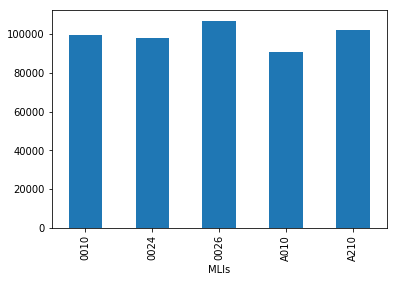

In [30]:
# Create graph
df['Projects'].plot.bar()

print("The most popular MLI")
df.sort_values(by='Projects', ascending=False)